# Learning From Data Homework #2

https://work.caltech.edu/homework/hw2.pdf

## Hoeffding Inequality

Run a computer simulation for flipping 1,000 virtual fair coins. Flip each coin independently 10 times. Focus on 3 coins as follows: c1 is the first coin flipped, crand is a
coin chosen randomly from the 1,000, and cmin is the coin which had the minimum
frequency of heads (pick the earlier one in case of a tie). Let ν1, νrand, and νmin be
the fraction of heads obtained for the 3 respective coins out of the 10 tosses.
Run the experiment 100,000 times in order to get a full distribution of ν1, νrand, and
νmin (note that crand and cmin will change from run to run).

1. The average value of νmin is closest to:  
[a] 0  
[b] **0.01** <---  
[c] 0.1  
[d] 0.5   
[e] 0.67  

2. Which coin(s) has a distribution of ν that satisfies the (single-bin) Hoeffding
Inequality?   
[a] c1 only  
[b] crand only  
[c] cmin only  
[d] **c1 and crand** <--  
[e] cmin and crand  

In [43]:
import numpy as np

v1s = []
vrands = []
vmins = []

for i in range(100000):

    # 1 = heads, 0 = tails
    C = np.random.randint(0, 1+1, [1000, 10])

    c1 = C[0,:]
    crand = C[np.random.randint(0, 1000),:]
    cmin = C[np.argmin(np.sum(C, axis=1)),:]

    v1s.append(np.mean(c1))
    vrands.append(np.mean(crand))
    vmins.append(np.mean(cmin))


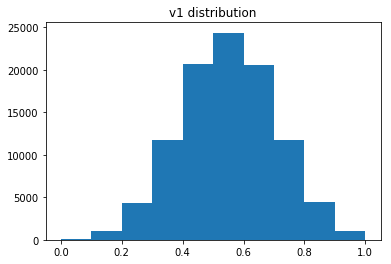

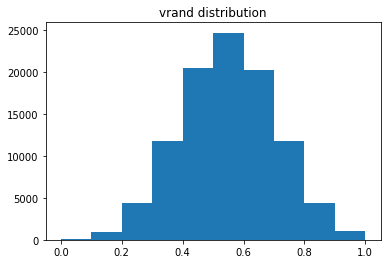

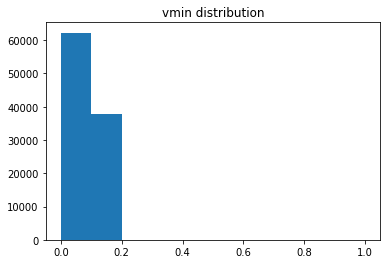

Mean of vmin is  0.037752999999999995


In [44]:
plt.hist(v1s, bins=np.linspace(0, 10, 11)/10)
plt.title("v1 distribution")
plt.show()

plt.hist(vrands, bins=np.linspace(0, 10, 11)/10)
plt.title("vrand distribution")
plt.show()

plt.hist(vmins, bins=np.linspace(0, 10, 11)/10)
plt.title("vmin distribution")
plt.show()

print("Mean of vmin is ", np.mean(vmins))

## Error and Noise

Consider the bin model for a hypothesis h that makes an error with probability µ in
approximating a deterministic target function f (both h and f are binary functions).
If we use the same h to approximate a noisy version of f given by:

P(y | x) = λ y for f(x) and 1 − λ for y $\neq$ f(x)

3. What is the probability of error that h makes in approximating y? Hint: Two
wrongs can make a right!

[a] µ  
[b] λ  
[c] 1-µ  
[d] (1 − λ) ∗ µ + λ ∗ (1 − µ)  
[e] **(1 − λ) ∗ (1 − µ) + λ ∗ µ  ** <-- answer  



A) h(x) fails to approximate f(x). But y != f(x) due to noise. Same answer, so counts as correct.
B) h(x) = f(x). But y!= f(x) due to noise. Different answers, so incorrect.
C) h(x) != f(x), and y=f(x). Different answers, so incorrect.
D) h(x) = f(x), and y=f(x). Same answers, so correct.

Answer is sum of B) and C).

$$ P(B) + P(C) = (1 - \mu)(1-\lambda) + \mu\lambda $$

which is alternative [e]

4. At what value of λ will the performance of h be independent of µ?
[a] 0  
[b] 0.5  
[c] 1/√2  
[d] 1  
[e] No values of λ  

**Answer:** (alternative [b])

$$ P(h(x)=y) = \mu + \lambda(1-2\mu) $$

If we choose $\lambda=\frac12$ we get

$$ P(h(x)=y) = \frac12 $$

which is independent of $\mu$.

## Linear Regression

In these problems, we will explore how Linear Regression for classification works. As
with the Perceptron Learning Algorithm in Homework # 1, you will create your own
target function f and data set D. Take d = 2 so you can visualize the problem, and
assume X = [−1, 1] × [−1, 1] with uniform probability of picking each x ∈ X . In
each run, choose a random line in the plane as your target function f (do this by
taking two random, uniformly distributed points in [−1, 1] × [−1, 1] and taking the
line passing through them), where one side of the line maps to +1 and the other maps
to −1. Choose the inputs xn of the data set as random points (uniformly in X ), and
evaluate the target function on each xn to get the corresponding output yn.
5. Take N = 100. Use Linear Regression to find g and evaluate Ein, the fraction of
in-sample points which got classified incorrectly. Repeat the experiment 1000
times and take the average (keep the g’s as they will be used again in Problem
6). Which of the following values is closest to the average Ein? (Closest is the
option that makes the expression |your answer −given option| closest to 0. Use
this definition of closest here and throughout.)


In [85]:
import numpy as np
from matplotlib import pyplot as plt

d = 2

class Dataset:
    def __init__(self, N):
        self.X = 2*np.random.rand(N, d+1)-1
        self.X[:,0] = 1.0
        X = self.X
        xa = 2*np.random.rand() - 1
        ya = 2*np.random.rand() - 1
        xb = 2*np.random.rand() - 1
        yb = 2*np.random.rand() - 1
        xa, xb = min(xa, xb), max(xa, xb)
        self.xa = xa
        self.ya = ya
        self.xb = xb
        self.yb = yb
        self.a = (yb-ya)/(xb-xa)
        self.y = self.evaluate(X)
        
    def evaluate(self, X):
        return 2*(X[:,2] > self.ya + (X[:,1] - self.xa)*self.a)-1
        
    def plot(self, y=None):
        above = self.X[np.where(self.y < 0)]
        below = self.X[np.where(self.y >= 0)]
        plt.scatter(above[:,1], above[:,2], marker="x")
        plt.scatter(below[:,1], below[:,2], marker="o")
        if not y is None:
            wrong = np.where(y != self.y)
            plt.scatter(self.X[wrong,1], self.X[wrong,2], c="red")
        plt.plot([self.xa, self.xb], [self.ya, self.yb])
        plt.show()
        
        
def fit_ls(X, y):
    return np.linalg.solve(X.T@X, X.T@y)

def evaluate(X, w):
    return np.sign(X@w)

N = 100
gs = np.zeros([1000, N])

total_Ein = 0.0
for i in range(1000):
    ds = Dataset(N)
    w_ls = fit_ls(ds.X, ds.y)
    total_Ein += np.sum(evaluate(ds.X, w_ls) != ds.y)/N
    
print(total_Ein/1000)

0.03854000000000012
